In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [3]:
data = pd.read_excel(r"D:\DataCUSAAssgn1.xls")
data = data.drop('Srl No',1)

In [4]:
data.head()

,V1 - I plan my expenses…,V2 - I always use new brands…,V3 - Weekends at home with family…,V4 - Buy more by impulse while shopping…,V5 - Watch online rather than TV shows,"V6 - Prefer reading, music rather than sports wctivities",V7 - Watch movies in first few days of release,V8 - I order for everyone while eating out,V9 - Some physical exercise everyday,"V10 - Prefer light, sober colours",...,Q2 - Mobile Phn Brand,Q3 - Favourite Soft Drink,Q4 - Newspaper read,Q5 - Shower Gel,Q6 - Hand sanitizers,Q7 - Face washes,Q8 - Hair conditioner,Q9 - Tea_Coffee,Q10 - Gender,Q11 - Occupation
0,4,9,4,6,9,8,9,8,8,8,...,Samsung,Cola,Economic Times,3,4,4,3,1,1,1
1,9,6,9,1,5,9,8,8,9,5,...,Others,Orange,The Hindu,1,2,2,3,1,1,1
2,4,6,5,7,6,5,0,5,3,7,...,HTC,Fruit flavour,Times of India,2,3,4,3,2,1,1
3,6,9,5,10,10,5,6,5,4,6,...,Others,I do not consume soft drinks at all,The Hindu,3,3,4,3,1,2,1
4,8,1,9,7,8,9,1,1,7,9,...,Others,Fruit flavour,Economic Times,2,3,2,2,1,1,1


In [5]:
data.columns

Index(['V1 - I plan my expenses…', 'V2 - I always use new brands…',
       'V3 - Weekends at home with family…',
       'V4 - Buy more by impulse while shopping…',
       'V5 - Watch online rather than TV shows',
       'V6 - Prefer reading, music rather than sports wctivities',
       'V7 - Watch movies in first few days of release',
       'V8 - I order for everyone while eating out',
       'V9 - Some physical exercise everyday',
       'V10 - Prefer light, sober colours',
       'V11 - I discuss my problem, rather than keeping them to myself',
       'V12 - I like performing on a stage in front of a huge crowd',
       'V13 - At parties, I like mingling with new people rather than sticking to my close circle',
       'V14 - Math Science were my favourite subjects in school',
       'V15 - When I see a new, interesting ad I most often end up buying the brand',
       'Q2 - Mobile Phn Brand', 'Q3 - Favourite Soft Drink',
       'Q4 - Newspaper read', 'Q5 - Shower Gel', 'Q6 - Hand san

In [6]:
cluster = data.loc[:,'V1 - I plan my expenses…':'V15 - When I see a new, interesting ad I most often end up buying the brand']

In [7]:
cluster.head()

,V1 - I plan my expenses…,V2 - I always use new brands…,V3 - Weekends at home with family…,V4 - Buy more by impulse while shopping…,V5 - Watch online rather than TV shows,"V6 - Prefer reading, music rather than sports wctivities",V7 - Watch movies in first few days of release,V8 - I order for everyone while eating out,V9 - Some physical exercise everyday,"V10 - Prefer light, sober colours","V11 - I discuss my problem, rather than keeping them to myself",V12 - I like performing on a stage in front of a huge crowd,"V13 - At parties, I like mingling with new people rather than sticking to my close circle",V14 - Math Science were my favourite subjects in school,"V15 - When I see a new, interesting ad I most often end up buying the brand"
0,4,9,4,6,9,8,9,8,8,8,8,4,6,7,7
1,9,6,9,1,5,9,8,8,9,5,2,8,1,8,2
2,4,6,5,7,6,5,0,5,3,7,0,4,3,7,3
3,6,9,5,10,10,5,6,5,4,6,5,7,6,10,6
4,8,1,9,7,8,9,1,1,7,9,6,1,7,8,2


In [77]:
##pd.DataFrame(cluster.corr())

it seems there is no correlation between variables.

In [8]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=15)

In [10]:
PC =pd.DataFrame(pca.fit_transform(cluster))

In [11]:
pca.explained_variance_ratio_[:10].sum()

0.7988266537231514

In [12]:
cluster_pca = pd.DataFrame(PC.loc[:,0:10])

In [13]:
cluster_pca.shape

(400, 11)

In [14]:
TSS = []
for k in range(1,8):
    Km = KMeans(n_clusters=k,n_init=50,random_state=42)
    ss = Km.fit(cluster_pca).inertia_
    TSS.append(ss)
print(min(TSS))

31159.889982246998


we have tried different values of k (no of clusters) and tried to find at which point we are getting minimum error.

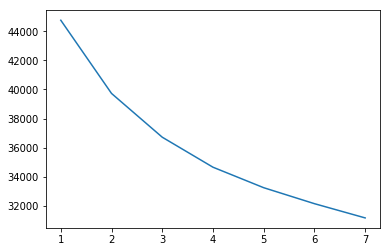

In [15]:
plt.plot(range(1,8),TSS)

plt.show()

we are getting elbow point at k =3, so will take no of cluster as 4 in our further analysis.

In [16]:
km =KMeans(n_clusters=3,n_init=50,random_state=42)
fit = km.fit(cluster_pca)

In [17]:
fit

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [18]:
score = pd.DataFrame(fit.cluster_centers_).T
score

,0,1,2
0,1.434603,3.438989,-4.325039
1,-3.619562,3.385683,0.917698
2,-1.036967,0.395440,0.738944
3,0.113699,-0.018723,-0.101435
4,-0.133156,0.646145,-0.398416
5,-0.220907,0.441306,-0.138435
6,0.153110,-0.033780,-0.129495
7,-0.081342,0.501974,-0.332255
8,-0.170230,0.093300,0.097788
9,0.181021,-0.144996,-0.066054


In [19]:
silhouette_score(X=cluster_pca, labels=fit.labels_)

0.09530190558867516

In [40]:
labels = np.array(fit.labels_)
labels

array([2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1,
       0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2,
       1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0,
       1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0,
       1, 0, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2,

In [113]:
km =KMeans(n_clusters=3,n_init=50,random_state=42)
fit = km.fit(data.iloc[:,0:15])

In [114]:
silhouette_score(X=data.iloc[:,0:15], labels=fit.labels_)

0.07915320093345514

# Hierarchical Clustering

In [34]:
link = linkage(y=preprocessing.scale(cluster),method='complete')

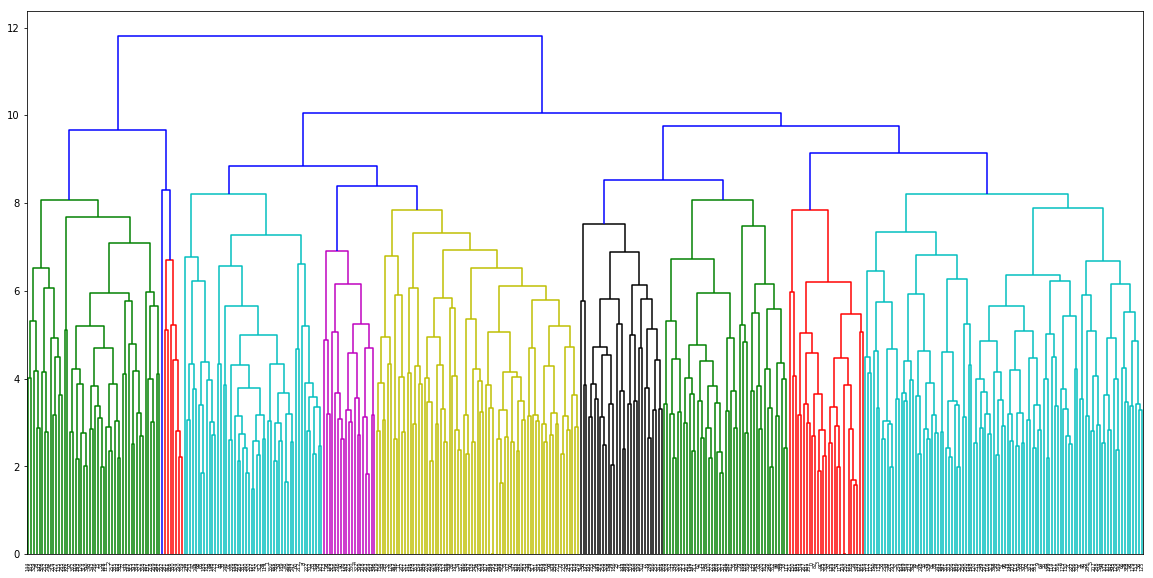

In [35]:
plt.figure(figsize=(20,10))
dendrogram(link)
plt.show()

In [36]:
c = cut_tree(link,height=9)
c.shape

(400, 1)

In [37]:
silhouette_score(cluster,c)

C:\Users\Umang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.005036846445229155

In [17]:
labels.shape

(400,)

In [22]:
data_with_labels = data.copy()

In [23]:
data_with_labels.insert(loc=25,column='Cluster',value=labels)

In [24]:
data_with_labels.head()

,V1 - I plan my expenses…,V2 - I always use new brands…,V3 - Weekends at home with family…,V4 - Buy more by impulse while shopping…,V5 - Watch online rather than TV shows,"V6 - Prefer reading, music rather than sports wctivities",V7 - Watch movies in first few days of release,V8 - I order for everyone while eating out,V9 - Some physical exercise everyday,"V10 - Prefer light, sober colours",...,Q3 - Favourite Soft Drink,Q4 - Newspaper read,Q5 - Shower Gel,Q6 - Hand sanitizers,Q7 - Face washes,Q8 - Hair conditioner,Q9 - Tea_Coffee,Q10 - Gender,Q11 - Occupation,Cluster
0,4,9,4,6,9,8,9,8,8,8,...,Cola,Economic Times,3,4,4,3,1,1,1,2
1,9,6,9,1,5,9,8,8,9,5,...,Orange,The Hindu,1,2,2,3,1,1,1,1
2,4,6,5,7,6,5,0,5,3,7,...,Fruit flavour,Times of India,2,3,4,3,2,1,1,0
3,6,9,5,10,10,5,6,5,4,6,...,I do not consume soft drinks at all,The Hindu,3,3,4,3,1,2,1,2
4,8,1,9,7,8,9,1,1,7,9,...,Fruit flavour,Economic Times,2,3,2,2,1,1,1,0


In [25]:
segment_1 = data_with_labels.loc[data_with_labels['Cluster']==0]
segment_2 = data_with_labels.loc[data_with_labels['Cluster']==1]
segment_3 = data_with_labels.loc[data_with_labels['Cluster']==2]

In [26]:
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([144, 116, 140], dtype=int64))

In [27]:
segment_1.shape,segment_2.shape, segment_3.shape

((144, 26), (116, 26), (140, 26))

size of clusters,
cluster 1 = 144,
cluster 2 = 116,
cluster 3 = 140

In [28]:
data_with_labels.columns

Index(['V1 - I plan my expenses…', 'V2 - I always use new brands…',
       'V3 - Weekends at home with family…',
       'V4 - Buy more by impulse while shopping…',
       'V5 - Watch online rather than TV shows',
       'V6 - Prefer reading, music rather than sports wctivities',
       'V7 - Watch movies in first few days of release',
       'V8 - I order for everyone while eating out',
       'V9 - Some physical exercise everyday',
       'V10 - Prefer light, sober colours',
       'V11 - I discuss my problem, rather than keeping them to myself',
       'V12 - I like performing on a stage in front of a huge crowd',
       'V13 - At parties, I like mingling with new people rather than sticking to my close circle',
       'V14 - Math Science were my favourite subjects in school',
       'V15 - When I see a new, interesting ad I most often end up buying the brand',
       'Q2 - Mobile Phn Brand', 'Q3 - Favourite Soft Drink',
       'Q4 - Newspaper read', 'Q5 - Shower Gel', 'Q6 - Hand san

In [29]:
data_with_labels['Q2 - Mobile Phn Brand'].value_counts()


Others      209
Samsung      68
Apple        62
Micromax     17
HTC          17
Sony         12
LG            8
Nokia         7
Name: Q2 - Mobile Phn Brand, dtype: int64

In [30]:
mean_seg_1 = []
for i in cluster.columns:
    a=segment_1[i].mean()
    mean_seg_1.append(a)
  

In [31]:
mean_seg_2 = []
for i in cluster.columns:
    a=segment_2[i].mean()
    mean_seg_2.append(a)


In [32]:
mean_seg_3 = []
for i in cluster.columns:
    a=segment_3[i].mean()
    mean_seg_3.append(a)

In [33]:
attribute_score = pd.DataFrame()

In [34]:
attribute_score['segment_1'] = mean_seg_1
attribute_score['segment_2'] = mean_seg_2
attribute_score['segment_3'] = mean_seg_3

In [35]:
attribute_score

,segment_1,segment_2,segment_3
0,4.902778,6.534483,6.457143
1,4.798611,4.362069,6.342857
2,6.368056,6.586207,6.100000
3,6.541667,3.586207,6.671429
4,7.541667,6.448276,7.635714
5,6.916667,2.767241,4.907143
6,4.201389,2.681034,6.042857
7,4.840278,5.275862,6.942857
8,2.694444,6.956897,6.514286
9,6.638889,6.482759,6.835714


attribute score give us the mean value of 15 attributes for each cluster

In [43]:
labels1.value_counts()

0    144
2    140
1    116
dtype: int64

In [41]:
labels1=pd.Series(labels)

In [108]:
data_with_labels.groupby(['Cluster','Q2 - Mobile Phn Brand'])['Q2 - Mobile Phn Brand'].count()

Cluster  Q2 - Mobile Phn Brand
0        Apple                    21
         HTC                       8
         LG                        1
         Micromax                  3
         Nokia                     3
         Others                   77
         Samsung                  28
         Sony                      3
1        Apple                    14
         HTC                       5
         LG                        3
         Micromax                  7
         Nokia                     2
         Others                   66
         Samsung                  14
         Sony                      5
2        Apple                    27
         HTC                       4
         LG                        4
         Micromax                  7
         Nokia                     2
         Others                   66
         Samsung                  26
         Sony                      4
Name: Q2 - Mobile Phn Brand, dtype: int64

In [63]:
pd.pivot_table(data_with_labels,values='Q3 - Favourite Soft Drink',columns='Cluster',aggfunc=np.count_nonzero)

Cluster,0,1,2
Q3 - Favourite Soft Drink,144,116,140


In [86]:
data_with_labels['Cluster'].count()

400

In [107]:
data_with_labels.groupby(['Cluster','Q3 - Favourite Soft Drink'])['Q3 - Favourite Soft Drink'].count()

Cluster  Q3 - Favourite Soft Drink          
0        Cola                                   71
         Fruit flavour                          19
         I do not consume soft drinks at all    26
         Orange                                 10
         White/ Colourless                      18
1        Cola                                   33
         Fruit flavour                          14
         I do not consume soft drinks at all    39
         Orange                                 11
         White/ Colourless                      19
2        Cola                                   69
         Fruit flavour                          16
         I do not consume soft drinks at all    20
         Orange                                 14
         White/ Colourless                      21
Name: Q3 - Favourite Soft Drink, dtype: int64

In [106]:
data_with_labels.groupby(['Cluster','Q4 - Newspaper read'])['Q4 - Newspaper read'].count()

Cluster  Q4 - Newspaper read                                                 
0        Business Standards                                                       3
         Economic Times                                                          28
         Mint                                                                     6
         Regional Newspapers like Sanmarg, Jansatta, Anandabazar Patrika etc.     1
         The Hindu                                                               21
         The Hindustan Times                                                      7
         The Telegraph                                                           12
         Times of India                                                          66
1        Business Standards                                                       3
         Economic Times                                                          32
         Mint                                                                     

In [112]:
data_with_labels.groupby(['Cluster','Q5 - Shower Gel'])['Q5 - Shower Gel'].count()

Cluster  Q5 - Shower Gel
0        1                  20
         2                  32
         3                  24
         4                  68
1        1                  28
         2                  38
         3                  14
         4                  36
2        1                  11
         2                  39
         3                  31
         4                  59
Name: Q5 - Shower Gel, dtype: int64

In [103]:
data_with_labels.groupby(['Cluster','Q6 - Hand sanitizers'])['Q6 - Hand sanitizers'].count()

Cluster  Q6 - Hand sanitizers
0        1                       12
         2                       57
         3                       28
         4                       47
1        1                       14
         2                       54
         3                       11
         4                       37
2        1                        2
         2                       36
         3                       24
         4                       78
Name: Q6 - Hand sanitizers, dtype: int64

In [104]:
data_with_labels.groupby(['Cluster','Q7 - Face washes'])['Q7 - Face washes'].count()

Cluster  Q7 - Face washes
0        1                     5
         2                    14
         3                    12
         4                   113
1        1                     7
         2                    19
         3                    17
         4                    73
2        1                     3
         2                    11
         3                    10
         4                   116
Name: Q7 - Face washes, dtype: int64

In [105]:
data_with_labels.groupby(['Cluster','Q8 - Hair conditioner'])['Q8 - Hair conditioner'].count()

Cluster  Q8 - Hair conditioner
0        1                        11
         2                        35
         3                        83
         4                        15
1        1                        15
         2                        33
         3                        54
         4                        14
2        1                        11
         2                        30
         3                        84
         4                        15
Name: Q8 - Hair conditioner, dtype: int64

In [97]:
data_with_labels.groupby(['Cluster','Q9 - Tea_Coffee'])['Q9 - Tea_Coffee'].count()

Cluster  Q9 - Tea_Coffee
0        1                  73
         2                  71
1        1                  72
         2                  44
2        1                  69
         2                  71
Name: Q9 - Tea_Coffee, dtype: int64

In [98]:
data_with_labels.groupby(['Cluster','Q10 - Gender'])['Q10 - Gender'].count()

Cluster  Q10 - Gender
0        1               75
         2               69
1        1               86
         2               30
2        1               91
         2               49
Name: Q10 - Gender, dtype: int64

In [99]:
data_with_labels.groupby(['Cluster','Q11 - Occupation'])['Q11 - Occupation'].count()

Cluster  Q11 - Occupation
0        1                   127
         2                    16
         3                     1
1        1                   100
         2                    13
         3                     3
2        1                   119
         2                    18
         3                     3
Name: Q11 - Occupation, dtype: int64